In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('Data/Cleaner/Frackit.csv').drop('Unnamed: 0',1)

In [24]:
df.head()

,OperatorName,Projection,TVD,TotalBaseWaterVolume,CountyName,FFVersion,FederalWell,Start,End
0,Aera Energy LLC,NAD83,1861.0,80472.0,Kern,1,0,2012,2012
1,Aera Energy LLC,NAD83,2087.0,86058.0,Kern,1,0,2012,2012
2,Aera Energy LLC,NAD83,NaN,NaN,Kern,1,0,2012,2012
3,Aera Energy LLC,NAD83,NaN,NaN,Kern,1,0,2012,2012
4,Aera Energy LLC,NAD83,NaN,NaN,Kern,1,0,2012,2012


In [25]:
df['has_fracking'] = 0
df = df[['CountyName', 'has_fracking']]
df = df.groupby(['CountyName'])['has_fracking'].count().reset_index()
df.columns = ['Name', 'has_fracking']
df.head()

,Name,has_fracking
0,Colusa,3
1,Glenn,1
2,Kern,3033
3,Kings,1
4,Los Angeles,23


In [26]:
df.shape

(7, 2)

In [27]:
#percent of counties in CA that have a super fund site
7/58

0.1206896551724138

In [28]:
df.sort_values('has_fracking', ascending=False, inplace=True)
df.columns = ['County', 'Fracking Sites']
df.head(10)

,County,Fracking Sites
2,Kern,3033
6,Ventura,33
4,Los Angeles,23
5,Sutter,15
0,Colusa,3
1,Glenn,1
3,Kings,1


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


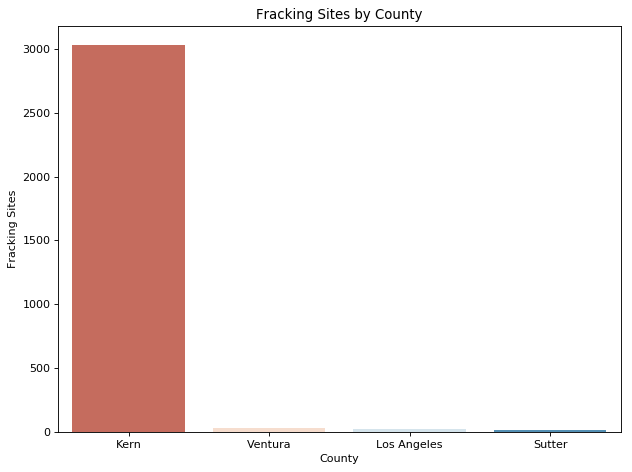

In [34]:
d = df[:4]
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Fracking Sites by County')
sns.barplot(x='County', y='Fracking Sites', data=d, palette='RdBu')
plt.tight_layout()